# Python Answer 6

In [1]:
# importing required libraraies

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# to display all the columns
pd.options.display.max_columns = None

In [3]:
# reading data from the excel file from answer 3
data = pd.read_excel('./pokemon.xlsx')
data.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,type_0,type_1,multiplier_0,multiplier_1,weakness_0,weakness_1,weakness_2,weakness_3,weakness_4,weakness_5,weakness_6,prev_evol_1_num,prev_evol_1_name,prev_evol_2_num,prev_evol_2_name,next_evol_1_num,next_evol_1_name,next_evol_2_num,next_evol_2_name,next_evol_3_num,next_evol_3_name
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,2,0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,1,4,2,0,Grass,Poison,1.58,NaN,Fire,Ice,Flying,Psychic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Ivysaur,3.0,Venusaur,NaN,NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,2,0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,2,4,1,1,Grass,Poison,1.20,1.6,Fire,Ice,Flying,Psychic,NaN,NaN,NaN,1.0,Bulbasaur,NaN,NaN,3.0,Venusaur,NaN,NaN,NaN,NaN
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,2,2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.017,1.7,11:30,0,4,0,2,Grass,Poison,NaN,NaN,Fire,Ice,Flying,Psychic,NaN,NaN,NaN,1.0,Bulbasaur,2.0,Ivysaur,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,1,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.253,25.3,08:45,1,3,2,0,Fire,NaN,1.65,NaN,Water,Ground,Rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,Charmeleon,6.0,Charizard,NaN,NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,1,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.012,1.2,19:00,1,3,1,1,Fire,NaN,1.79,NaN,Water,Ground,Rock,NaN,NaN,NaN,NaN,4.0,Charmander,NaN,NaN,6.0,Charizard,NaN,NaN,NaN,NaN


## Pokemons whose spawn rate is less than 5%.

In [4]:
less_than_5_prcnt = data[data.spawn_chance < 5]
print('First 5 Result\n', less_than_5_prcnt.name.head())
print('_'*25)
print('Number of Pokemons', less_than_5_prcnt.shape[0])
print('_'*25)

First 5 Result
 0     Bulbasaur
1       Ivysaur
2      Venusaur
3    Charmander
4    Charmeleon
Name: name, dtype: object
_________________________
Number of Pokemons 147
_________________________


So there are 147 Pokemons whose Spawn chance is less than 5%.

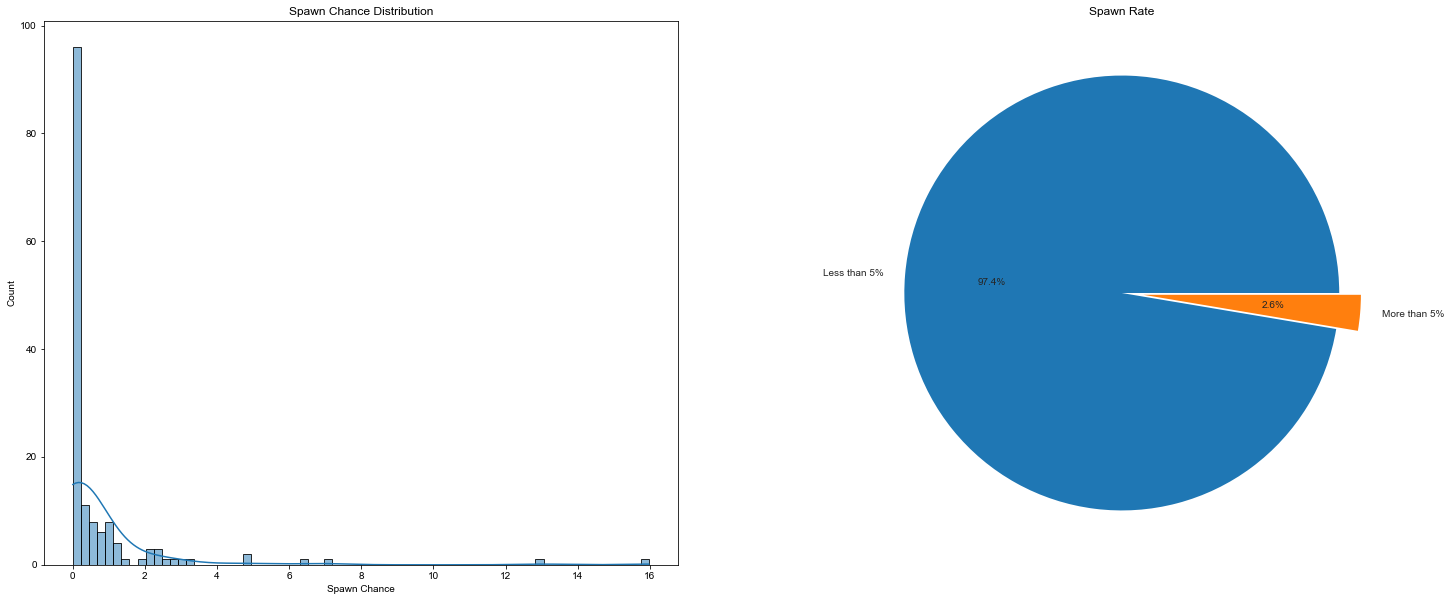

In [5]:
x = [less_than_5_prcnt.shape[0], data.shape[0] - less_than_5_prcnt.shape[0]]
labels = ['Less than 5%', 'More than 5%']
# creating figure and axes
fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(25, 10))
plt.style.use('seaborn-darkgrid')
# histogram
sns.histplot(data=data.spawn_chance, kde=True, ax=ax_1)
# pie plot
ax_2.pie(x=x, labels=labels, radius=1, autopct='%1.1f%%', explode=[0, 0.1])

ax_1.set_title('Spawn Chance Distribution')
ax_1.set_xlabel('Spawn Chance')
ax_2.set_title('Spawn Rate')
plt.show()

Conclusion: As we see most of the Pokemon's Spawn Chance is less than 4%.

## Pokemon that have less than 4 weaknesses.

In [6]:
less_weakness = data[data.weaknesses < 4]
print('First 5 Results\n', less_weakness.head().name)
print('_'*25)
print('Number of Pokemons', less_weakness.shape[0])
print('_'*25)

First 5 Results
 3    Charmander
4    Charmeleon
5     Charizard
6      Squirtle
7     Wartortle
Name: name, dtype: object
_________________________
Number of Pokemons 102
_________________________


There are 102 Pokemons who has less than 4 weakness.

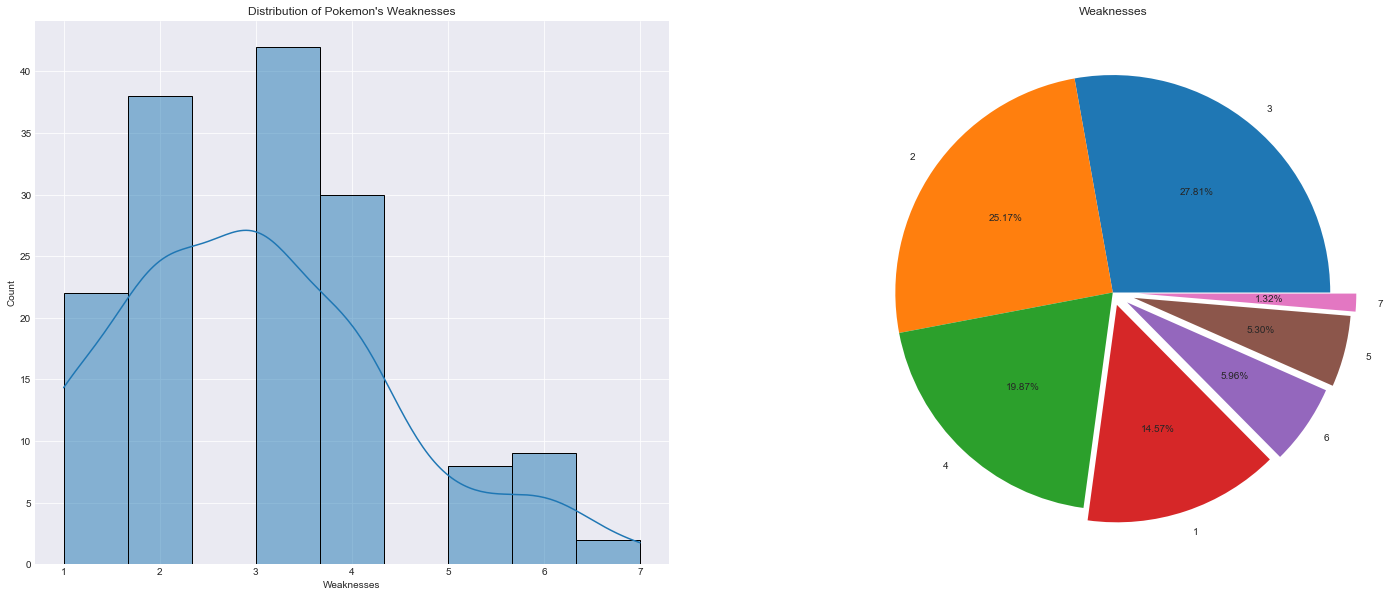

In [7]:
# counting all values in weaknesses column
x = data.weaknesses.value_counts()
# creating figure and axes
fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(25, 10))
# histogram
sns.histplot(data=data.weaknesses, kde=True, palette='pastel', ax=ax_1)
# pie plot
ax_2.pie(x=x.values, labels=x.index, autopct='%1.2f%%', radius=1, explode=(0, 0, 0, 0.06, 0.08, 0.1, 0.12))

ax_1.set_title("Distribution of Pokemon's Weaknesses")
ax_1.set_xlabel('Weaknesses')
ax_2.set_title('Weaknesses')
plt.show()

## Pokemon that have no multipliers at all.

In [8]:
no_multipliers = data[data.multipliers == 0]
print('Top 5 Results\n', no_multipliers.head().name)
print('*'*25)
print('Number of Pokemons', no_multipliers.shape[0])
print('*'*25)

Top 5 Results
 2       Venusaur
5      Charizard
8      Blastoise
11    Butterfree
14      Beedrill
Name: name, dtype: object
*************************
Number of Pokemons 81
*************************


There are 81 Pokemons who has no multipliers at all.

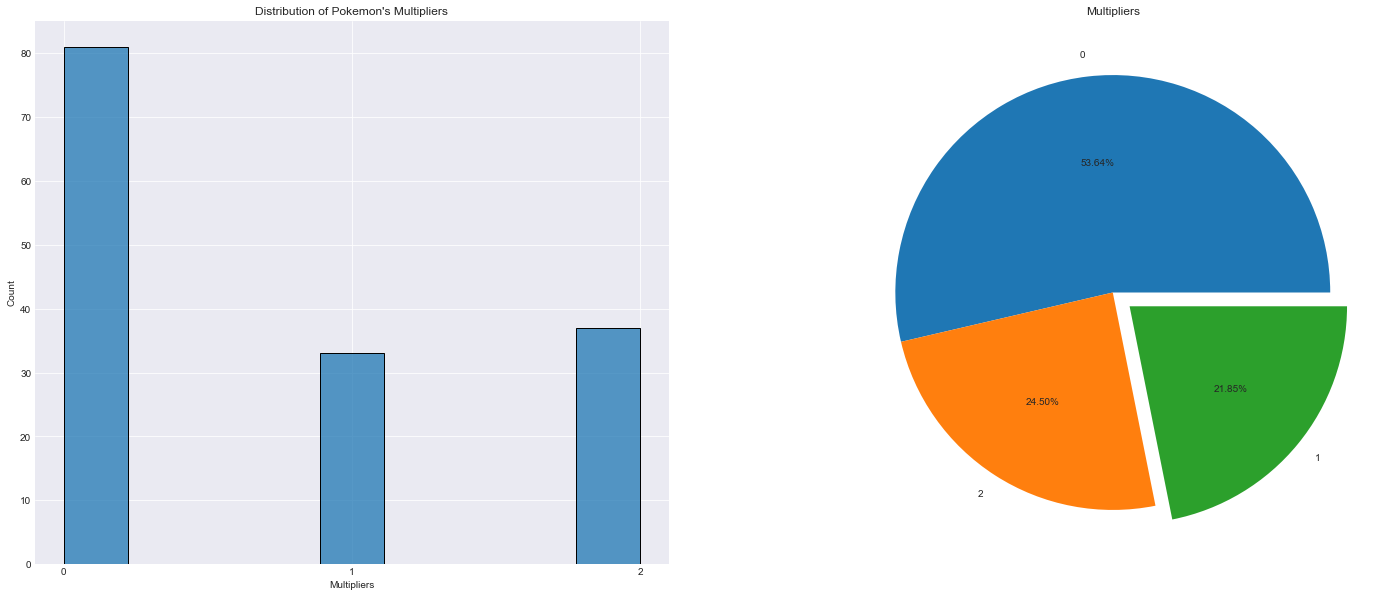

In [9]:
# counting values in multipliers column
x = data.multipliers.value_counts()
# creating figure and axes
fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(25, 10))
# histogram
sns.histplot(data=data.multipliers, ax=ax_1)
# pie plot
ax_2.pie(x=x.values, labels=x.index, autopct='%1.2f%%', radius=1, explode=(0, 0, 0.1))
ax_1.set_title("Distribution of Pokemon's Multipliers")
ax_1.set_xlabel('Multipliers')
ax_1.set_xticks([0, 1, 2])
ax_2.set_title('Multipliers')
plt.show()

Most of the Pokemons has no multipliers

## Pokemon that do not have more than 2 evolutions.

In [10]:
evolutions = data[data.next_evolution <= 2]
print('Top 5 Results\n', evolutions.head().name)
print('-'*25)
print('Number of Pokemons', evolutions.shape[0])
print('-'*25)

Top 5 Results
 0     Bulbasaur
1       Ivysaur
2      Venusaur
3    Charmander
4    Charmeleon
Name: name, dtype: object
-------------------------
Number of Pokemons 150
-------------------------


There are 150 Pokemons who has Next Evolution less than 2.

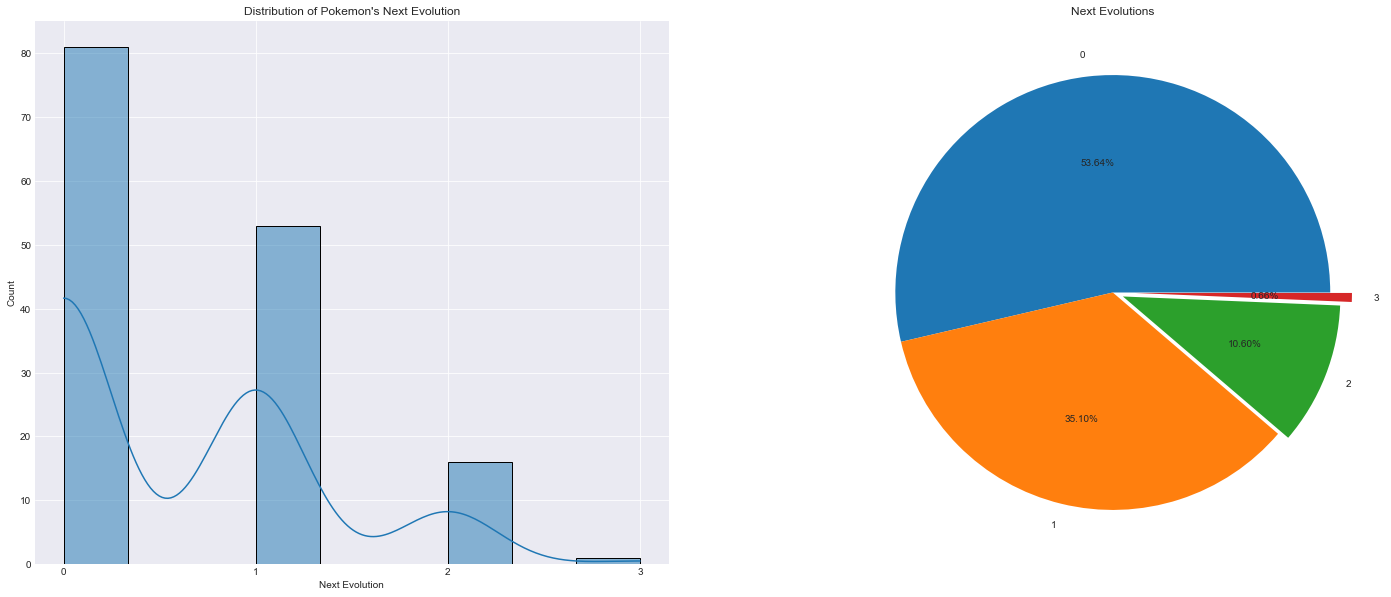

In [11]:
# counting values in next_evolution column
x = data.next_evolution.value_counts()
# creating figure and axes
fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(25, 10))
# histogram
sns.histplot(data=data.next_evolution, kde=True, palette='pastel', ax=ax_1)
# pie plot
ax_2.pie(x=x.values, labels=x.index, autopct='%1.2f%%', radius=1, explode=(0, 0, 0.05, 0.1))
ax_1.set_title("Distribution of Pokemon's Next Evolution")
ax_1.set_xlabel('Next Evolution')
ax_1.set_xticks(x.index)
ax_2.set_title('Next Evolutions')
plt.show()

## Pokemon whose spawn time is less than 300 seconds.

In [12]:
time = pd.to_timedelta('00:'+data.spawn_time)
spawn_time = data[time < pd.to_timedelta('300 seconds')]
print('Top 5 Results\n', spawn_time.head().name)
print('-'*25)
print('Number of Pokemons', spawn_time.shape[0])
print('-'*25)

Top 5 Results
 6      Squirtle
8     Blastoise
10      Metapod
12       Weedle
13       Kakuna
Name: name, dtype: object
-------------------------
Number of Pokemons 75
-------------------------


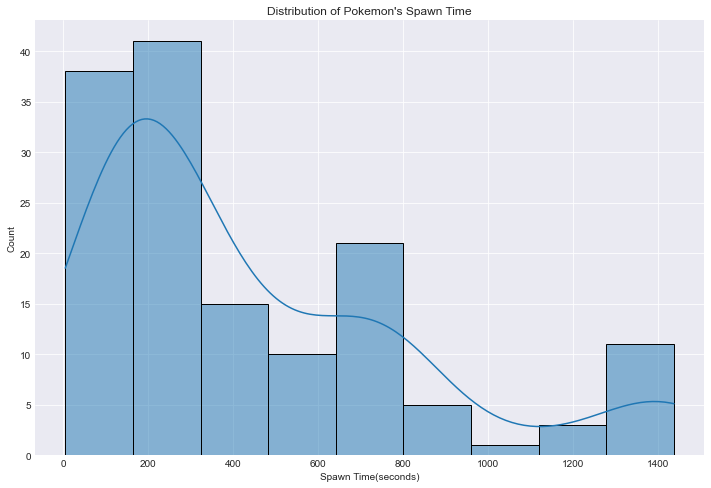

In [13]:
# creating figure and axes
fig, ax = plt.subplots(figsize=(12, 8))
# histogram
sns.histplot(data=time.dt.seconds, kde=True, palette='husl', ax=ax)
ax.set_title("Distribution of Pokemon's Spawn Time")
ax.set_xlabel('Spawn Time(seconds)')
plt.show()

Conclusion: Most of the Pokemons have Spawn Time less than 200 seconds.

## Pokemon who have more than two types of capabilies.

In [14]:
data.type.value_counts()

1    89
2    62
Name: type, dtype: int64

In [15]:
data[data.type > 2]

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,type_0,type_1,multiplier_0,multiplier_1,weakness_0,weakness_1,weakness_2,weakness_3,weakness_4,weakness_5,weakness_6,prev_evol_1_num,prev_evol_1_name,prev_evol_2_num,prev_evol_2_name,next_evol_1_num,next_evol_1_name,next_evol_2_num,next_evol_2_name,next_evol_3_num,next_evol_3_name


There are no pokemons who have more than two capabilities.